# Erzeugen von Trainingsdaten

In [90]:
import numpy as np
x = np.arange(0.0, 1.0, 0.01).reshape(-1,1)

In [91]:
x[:10]

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09]])

In [120]:
y = x*2.0

In [121]:
y[:10]

array([[0.  ],
       [0.02],
       [0.04],
       [0.06],
       [0.08],
       [0.1 ],
       [0.12],
       [0.14],
       [0.16],
       [0.18]])

# Erstellen eines NN mittels TensorFlow / Keras

In [122]:
nr_inputs = 1

In [142]:
from tensorflow import keras

m = keras.Sequential(name="Mein_NN")
l0 = keras.layers.Input(shape=(nr_inputs,))
l1 = keras.layers.Dense(10, activation="relu")
l2 = keras.layers.Dense(1)
m.add( l0 )
m.add( l1 )
m.add( l2 )
m.summary()

Model: "Mein_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                20        
                                                                 
 dense_33 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# Vorbereiten des Trainings und Training

In [143]:
m.compile(optimizer="sgd", loss=keras.losses.MeanSquaredError())

In [144]:
history = m.fit(x,y, epochs=2000, verbose=0)

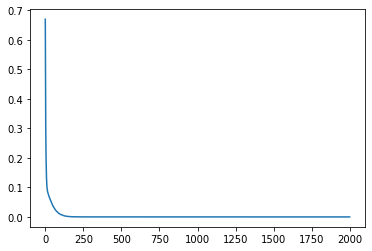

In [145]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.show()

# Modell anwenden

In [146]:
x_test = np.arange(0.0, 2.0, 0.01).reshape(-1,1)

In [147]:
x_test[:10]

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09]])

In [148]:
(x_test*2.0)[:10]

array([[0.  ],
       [0.02],
       [0.04],
       [0.06],
       [0.08],
       [0.1 ],
       [0.12],
       [0.14],
       [0.16],
       [0.18]])

In [149]:
preds = m.predict( x_test )
preds[:10]

array([[0.01683556],
       [0.0245927 ],
       [0.03991118],
       [0.05959244],
       [0.07959923],
       [0.09960604],
       [0.11961283],
       [0.13961963],
       [0.15962642],
       [0.17963324]], dtype=float32)

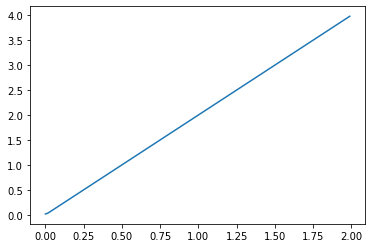

In [150]:
plt.plot(x_test, preds)
plt.show()

In [151]:
m.predict( [[0.0], [0.1], [0.5], [1.0], [1.5], [2.0]] )

array([[0.01683556],
       [0.19964002],
       [0.9999119 ],
       [2.0002518 ],
       [3.0005915 ],
       [4.0009317 ]], dtype=float32)